In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import scipy.fft as fft


fs: 44100


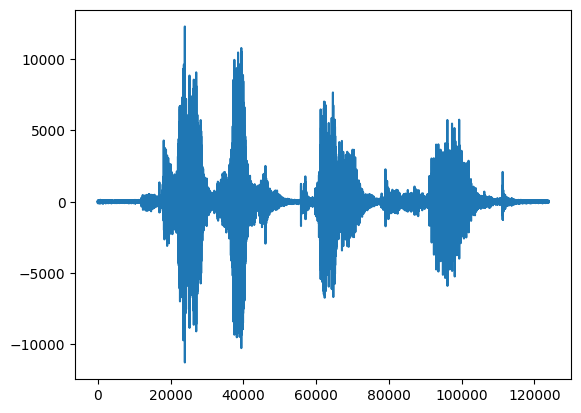

In [16]:
# Read file
file_path = "sounds/test.wav"
fs, signal = wavfile.read(file_path)

print(f"fs: {fs}")

plt.plot(signal)
plt.show()

In [17]:
# Window signal
window_length_ms = 20
window_length = int(np.round(fs*window_length_ms/1000))

print(f"windown_length_ms: {window_length_ms}")
print(f"window_length: {window_length}")

windown_length_ms: 20
window_length: 882


In [18]:
n = np.linspace(0.5, window_length, num=window_length)
print(n)

[5.00000000e-01 1.50056754e+00 2.50113507e+00 3.50170261e+00
 4.50227015e+00 5.50283768e+00 6.50340522e+00 7.50397276e+00
 8.50454030e+00 9.50510783e+00 1.05056754e+01 1.15062429e+01
 1.25068104e+01 1.35073780e+01 1.45079455e+01 1.55085131e+01
 1.65090806e+01 1.75096481e+01 1.85102157e+01 1.95107832e+01
 2.05113507e+01 2.15119183e+01 2.25124858e+01 2.35130533e+01
 2.45136209e+01 2.55141884e+01 2.65147560e+01 2.75153235e+01
 2.85158910e+01 2.95164586e+01 3.05170261e+01 3.15175936e+01
 3.25181612e+01 3.35187287e+01 3.45192963e+01 3.55198638e+01
 3.65204313e+01 3.75209989e+01 3.85215664e+01 3.95221339e+01
 4.05227015e+01 4.15232690e+01 4.25238365e+01 4.35244041e+01
 4.45249716e+01 4.55255392e+01 4.65261067e+01 4.75266742e+01
 4.85272418e+01 4.95278093e+01 5.05283768e+01 5.15289444e+01
 5.25295119e+01 5.35300795e+01 5.45306470e+01 5.55312145e+01
 5.65317821e+01 5.75323496e+01 5.85329171e+01 5.95334847e+01
 6.05340522e+01 6.15346198e+01 6.25351873e+01 6.35357548e+01
 6.45363224e+01 6.553688

In [19]:
windowpos = 92274
# windowpos = np.random.randint(int((len(signal) - window_length)))

windowed_signal = signal[windowpos:(windowpos+window_length)]
windowed_signal = windowed_signal/np.max(np.abs(windowed_signal))

print(f"windowed_signal: {windowed_signal}")

windowed_signal: [-4.65557194e-02 -2.90709922e-02 -1.45354961e-02  1.26395618e-02
  1.26395618e-02  4.84516537e-03 -1.47461555e-02 -6.36191279e-02
 -8.70023173e-02 -8.99515483e-02 -8.17358332e-02 -4.14998947e-02
  5.89846219e-03  4.86623130e-02  8.61596798e-02  8.25784706e-02
  5.94059406e-02  1.13756056e-02 -3.79186855e-02 -7.56267116e-02
 -9.79566042e-02 -1.00273857e-01 -7.98398989e-02 -6.04592374e-02
 -4.59237413e-02 -3.05456078e-02 -4.57130819e-02 -4.55024226e-02
 -5.35074784e-02 -5.75100063e-02 -7.39414367e-02 -8.53170423e-02
 -8.00505582e-02 -9.12155045e-02 -1.10174847e-01 -1.07014957e-01
 -1.26184959e-01 -1.50410786e-01 -1.54623973e-01 -1.46829577e-01
 -1.33347377e-01 -1.24078365e-01 -1.18811881e-01 -1.19022541e-01
 -1.19022541e-01 -1.14809353e-01 -1.03012429e-01 -9.73246261e-02
 -9.96418791e-02 -9.83779229e-02 -8.74236360e-02 -7.83652833e-02
 -7.77333052e-02 -6.86749526e-02 -4.69770381e-02 -2.71750579e-02
  8.42637455e-03  5.09795660e-02  1.02380451e-01  1.70423425e-01
  2.3004

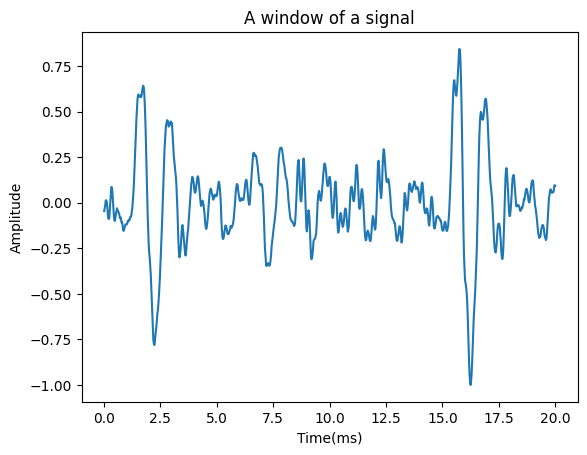

In [20]:
plt.plot(n*1000/fs, windowed_signal)
plt.xlabel("Time(ms)")
plt.ylabel("Amplitude")
plt.title("A window of a signal")
plt.show()

In [21]:
n2 = np.linspace(1 - window_length, window_length - 1, num=window_length*2)

# Sine window
window_fn = np.sin(np.pi*n/window_length)**2

# Spectrum
spectrum = fft.rfft(windowed_signal*window_fn, n=window_length*2)

print(f"spectrum: {spectrum}")
print(f"spectrum dimension: {spectrum.shape}")

spectrum: [-5.29341465e-01+0.00000000e+00j  1.14871959e-01+5.67325969e-01j
  6.81011975e-01-5.41581969e-01j -1.46597704e+00-8.94773337e-01j
 -1.22711094e+00+2.66764340e+00j  3.46190349e+00+1.54400246e+00j
  1.54963592e+00-3.19795595e+00j -1.86350513e+00-1.12085899e+00j
 -6.18938680e-01+7.79451050e-02j -1.41878477e+00+5.82874190e-01j
  9.80790634e-01+2.03227613e+00j  1.24330004e+00-1.04210424e+00j
 -1.42692800e-01+1.04132455e+00j  3.65107628e+00-1.29185839e+00j
 -2.14134469e+00-4.22096093e+00j -1.13784999e+00+1.79203670e+00j
  5.81372755e-01-4.26676470e+00j -8.21848488e+00+8.09049521e-01j
  1.54125910e+00+7.99407169e+00j  4.79212991e+00+3.89262123e-02j
  5.81218993e+00-2.45822499e+00j -3.24022291e+00-1.48283445e+01j
 -2.11698140e+01+5.36374910e+00j  5.02402872e+00+1.75779287e+01j
  3.38618820e+00-1.86349091e-01j  7.93202237e+00+1.20542914e+01j
  1.66124831e+01-1.62380442e+01j -2.13973068e+01-7.31565389e+00j
  6.14324416e+00+2.05886460e+01j  1.29297131e+01-1.12138871e+01j
 -5.36639791e+0

In [22]:
cc = np.abs(spectrum**2)
print(f"value: {cc}")
print(f"value: {cc.shape}")

value: [2.80202387e-01 3.35054323e-01 7.57088339e-01 2.94970800e+00
 8.62212255e+00 1.43687194e+01 1.26282937e+01 4.72897623e+00
 3.89160530e-01 2.35269254e+00 5.09209653e+00 2.63177624e+00
 1.10471805e+00 1.49992561e+01 2.24018682e+01 4.50609813e+00
 1.85432753e+01 6.81980548e+01 6.62806619e+01 2.29660243e+01
 3.98244219e+01 2.30378844e+02 4.76930830e+02 3.34224442e+02
 1.15009965e+01 2.08222919e+02 5.39648675e+02 5.11363528e+02
 4.61631793e+02 2.92928744e+02 3.17877193e+01 3.92280958e+01
 2.15973113e+01 1.29428247e+02 5.91044484e+02 7.07822150e+02
 4.74343483e+02 3.14745916e+02 8.05688177e+01 6.72463215e+01
 3.94893767e+02 4.35623761e+02 1.71093373e+02 7.87661272e+01
 1.75324603e+02 2.36668070e+02 1.75991206e+02 6.33498722e+01
 5.71205815e+00 5.57740754e+00 1.74061942e+01 2.78022022e+01
 2.61716358e+01 1.24943325e+01 3.08307019e+00 7.91865534e-01
 2.93955295e-01 5.84472406e-01 9.26364427e-01 6.04651589e-01
 1.07988091e-01 6.21720256e-02 5.47600140e-01 7.92648966e-01
 4.30349444e-01 7

In [23]:
autovariance = fft.irfft((np.abs(spectrum**2)))
print(f"autovariance: {autovariance}")
print(f"shape autovariance: {autovariance.shape}")

autovariance: [9.80318892 9.58198655 8.98592657 ... 8.14502735 8.98592657 9.58198655]
shape autovariance: (1764,)


In [24]:
print(autovariance[window_length])

4.148860645311243e-16


In [25]:
autovariance_concat = np.concatenate((autovariance[window_length:], autovariance[0:window_length]))

print(f"autovariance_concat: {autovariance_concat}")
print(f"autovariance_concat_shape: {autovariance_concat.shape}")

autovariance_concat: [ 4.14886065e-16  8.05604009e-17 -1.79939711e-13 ... -1.64439085e-12
 -1.80439186e-13  4.43082205e-17]
autovariance_concat_shape: (1764,)


In [26]:
# Simple example for why we need to center the autocorrelation or concatenate the autocorrelation
x = np.array([1, 2, 3, 2, 1])
autocorr = np.correlate(x, x, mode='full')

print("Full autocorrelation:", autocorr)
print("Length:", len(autocorr))
# Output: [1, 4, 10, 16, 19, 16, 10, 4, 1]
#         ↑──negative lags──↑  center  ↑─positive lags─↑
#         already centered!

# But with FFT method:
X = np.fft.fft(x, n=len(x)*2-1)
autocorr_fft = np.fft.ifft(X * np.conj(X)).real
print("FFT autocorr (before shift):", autocorr_fft)
# Needs fftshift to center!

autocorr_fft_centered = np.fft.fftshift(autocorr_fft)
print("FFT autocorr (after shift):", autocorr_fft_centered)

Full autocorrelation: [ 1  4 10 16 19 16 10  4  1]
Length: 9
FFT autocorr (before shift): [19. 16. 10.  4.  1.  1.  4. 10. 16.]
FFT autocorr (after shift): [ 1.  4. 10. 16. 19. 16. 10.  4.  1.]


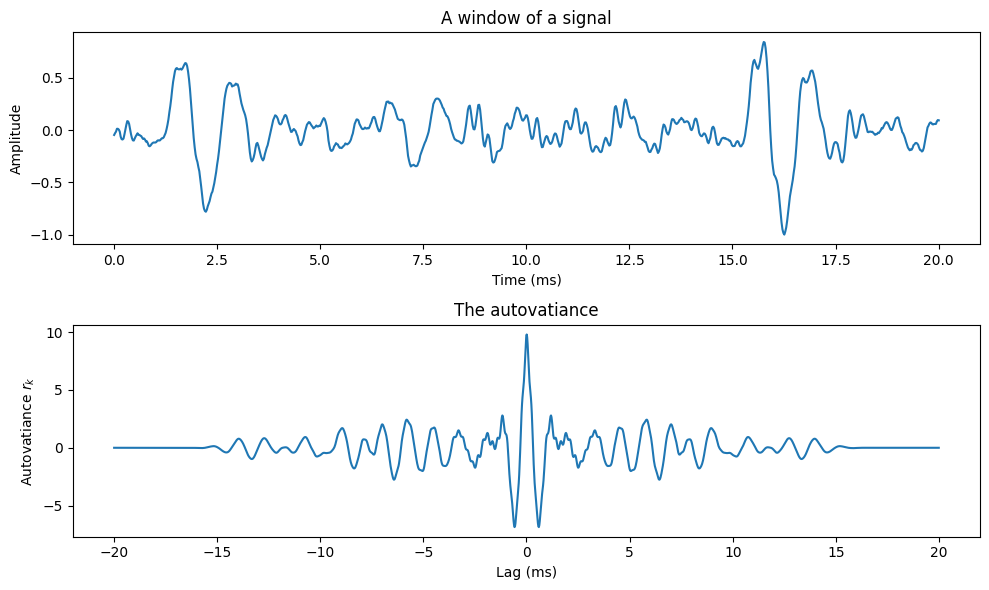

In [27]:
plt.figure(figsize=[10, 6])
plt.subplot(211)
plt.plot(n*1000/fs, windowed_signal)
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude")
plt.title("A window of a signal")

plt.subplot(212)
plt.plot(n2*1000/fs, autovariance_concat)
plt.xlabel("Lag (ms)")
plt.ylabel("Autovatiance $r_k$")
plt.title("The autovatiance")
plt.tight_layout()
plt.show()